<a href="https://colab.research.google.com/github/KunakornMart/DADS6003/blob/main/ML_As2_6610422020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,f1_score

#a. เลือกหุ้น จาก Yahoo Finance โดยใช้ Timeframe 1 hour
โดยผมเลือก Osprey Bitcoin Trust (OBTC) : https://finance.yahoo.com/quote/OBTC


ดึงข้อมูล Osprey Bitcoin Trust ([OBTC](https://finance.yahoo.com/quote/OBTC))

In [ ]:
obtc = yf.Ticker('OBTC')
interval = '1h'
start = '2022-02-22'
end = '2024-01-14'
df = obtc.history(interval=interval,start=start,end=end)
df = df.dropna()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Datetime,,,,,,,,
2022-02-22 09:30:00-05:00,10.5500,10.550,10.080,10.246,0,0.0,0.0,0.0
2022-02-22 10:30:00-05:00,10.2400,10.270,10.130,10.196,12275,0.0,0.0,0.0
2022-02-22 11:30:00-05:00,10.1300,10.174,10.000,10.010,5327,0.0,0.0,0.0
2022-02-22 12:30:00-05:00,10.0125,10.100,10.010,10.054,5846,0.0,0.0,0.0
2022-02-22 13:30:00-05:00,10.1500,10.150,10.070,10.070,421,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-01-12 11:30:00-05:00,12.8000,12.820,12.080,12.180,5189,0.0,0.0,0.0
2024-01-12 12:30:00-05:00,12.5000,12.640,12.090,12.090,3522,0.0,0.0,0.0
2024-01-12 13:30:00-05:00,12.5000,12.540,12.260,12.540,6775,0.0,0.0,0.0


# b. เพิ่ม Column ที่เราสนใจ
โดยผมเลือก Grayscale Bitcoin Trust (GBTC) : https://finance.yahoo.com/quote/GBTC  เพื่อนำมาเปรียบเทียบและใช้สร้างโมเดลด้วย

ดึงข้อมูล Grayscale Bitcoin Trust ([GBTC](https://finance.yahoo.com/quote/GBTC))

In [ ]:
gbtc = yf.Ticker('GBTC')
interval = '1h'
start = '2022-02-22'
end = '2024-01-14'
df2 = gbtc.history(interval=interval,start=start,end=end)
df2 = df2.dropna()
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Datetime,,,,,,,,
2022-02-22 09:30:00-05:00,25.650000,26.475000,25.500000,26.230000,0,0.0,0.0,0.0
2022-02-22 10:30:00-05:00,26.230000,26.230000,25.700001,25.910000,1035286,0.0,0.0,0.0
2022-02-22 11:30:00-05:00,25.889999,26.000000,25.600000,25.870001,962629,0.0,0.0,0.0
2022-02-22 12:30:00-05:00,25.860001,25.959999,25.690001,25.799999,967340,0.0,0.0,0.0
2022-02-22 13:30:00-05:00,25.809999,26.100000,25.799999,26.035000,861394,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-01-12 11:30:00-05:00,38.480000,38.560001,37.770000,38.070000,6816540,0.0,0.0,0.0
2024-01-12 12:30:00-05:00,38.070000,38.439999,37.980000,38.150101,4127433,0.0,0.0,0.0
2024-01-12 13:30:00-05:00,38.158501,38.349998,37.900002,38.299999,4199162,0.0,0.0,0.0


เปรียบเทียบหุ้น 2ตัว

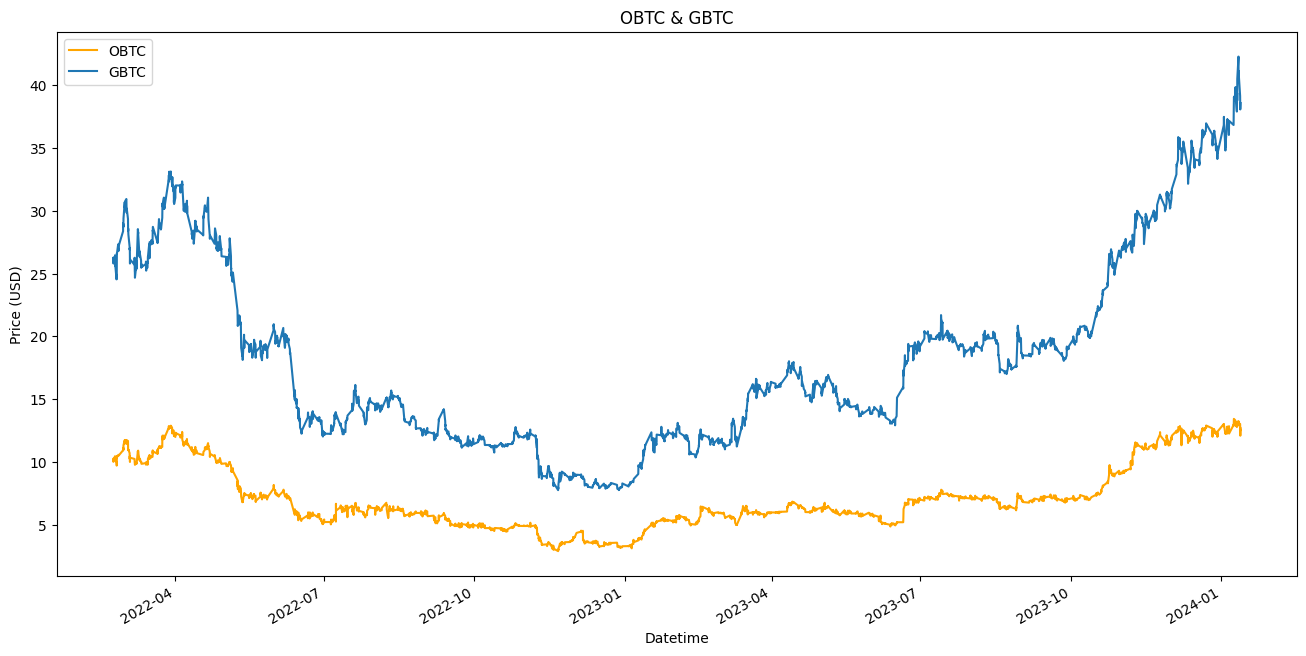

In [ ]:
#Plot กราฟหุ้น 2 ตัว โดยใช้ Matplotlib

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

df['Close'].plot(label='OBTC', color='orange')
df2['Close'].plot(label='GBTC')

plt.title('OBTC & GBTC')
plt.xlabel('Datetime')
plt.ylabel('Price (USD)')

plt.legend()

# ปรับแต่งข้อมูล

*เนื่องจากข้อมูลของ"GBTC" มีจำนวนแถวมากกว่า"OBTC" จึงใช้แถวของ"OBTC"เป็นหลัก โดยการวนลูปตาม Datetime ของ"OBTC" แล้วนำค่า"GBTC" ไปใส่ให้ตรงกัน โดยอ้างอิงจากข้อมูล Datetime เดียวกัน

In [ ]:
#เปลี่ยน Format Datetime ก่อน
df = df.reset_index()
df2 = df2.reset_index()
df['Datetime'] = pd.to_datetime(df['Datetime'], format = '%Y-%m-%d %H:%M:%S%:z').dt.strftime('%Y-%m-%d %H:%M')
df2['Datetime'] = pd.to_datetime(df2['Datetime'], format = '%Y-%m-%d %H:%M:%S%:z').dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
#สร้างคอลัมน์เพิ่มก่อนวนลูป เพื่อให้วนลูปแล้วเอาข้อมูลมาใส่ที่ลอลัมน์นี้
df['GBTC_Open'] = None
df['GBTC_Close'] = None

#วนลูปเอาราคาเปิด-ปิด ของ GBTC มาใส่
for i,date in enumerate(df['Datetime']):
    df['GBTC_Open'][i] = df2['Open'][df2['Datetime']==df.loc[i,'Datetime']].to_string(index=False)
    df['GBTC_Close'][i] = df2['Close'][df2['Datetime']==df.loc[i,'Datetime']].to_string(index=False)

<ipython-input-859-daa5e9cb3a8a>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-859-daa5e9cb3a8a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ข้อมูลใน dataframe รวม หลังจากเพิ่ม Column GBTC_Open, GBTC_Close

In [ ]:
df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,GBTC_Open,GBTC_Close
0,2022-02-22 09:30,10.5500,10.550,10.080,10.246,0,0.0,0.0,0.0,25.65,26.23
1,2022-02-22 10:30,10.2400,10.270,10.130,10.196,12275,0.0,0.0,0.0,26.23,25.91
2,2022-02-22 11:30,10.1300,10.174,10.000,10.010,5327,0.0,0.0,0.0,25.889999,25.870001
3,2022-02-22 12:30,10.0125,10.100,10.010,10.054,5846,0.0,0.0,0.0,25.860001,25.799999
4,2022-02-22 13:30,10.1500,10.150,10.070,10.070,421,0.0,0.0,0.0,25.809999,26.035
...,...,...,...,...,...,...,...,...,...,...,...
2756,2024-01-12 11:30,12.8000,12.820,12.080,12.180,5189,0.0,0.0,0.0,38.48,38.07
2757,2024-01-12 12:30,12.5000,12.640,12.090,12.090,3522,0.0,0.0,0.0,38.07,38.150101
2758,2024-01-12 13:30,12.5000,12.540,12.260,12.540,6775,0.0,0.0,0.0,38.158501,38.299999
2759,2024-01-12 14:30,12.5000,12.540,12.500,12.510,1702,0.0,0.0,0.0,38.299999,38.535


Type ของข้อมูลแต่ละ Column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Datetime       2761 non-null   object 
 1   Open           2761 non-null   float64
 2   High           2761 non-null   float64
 3   Low            2761 non-null   float64
 4   Close          2761 non-null   float64
 5   Volume         2761 non-null   int64  
 6   Dividends      2761 non-null   float64
 7   Stock Splits   2761 non-null   float64
 8   Capital Gains  2761 non-null   float64
 9   GBTC_Open      2761 non-null   object 
 10  GBTC_Close     2761 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 237.4+ KB


แปลง Column GBTC_Open, GBTC_Close เป็น float64 เหมือนข้อมูลอื่นๆ

In [ ]:
df['GBTC_Open'] = pd.to_numeric(df['GBTC_Open'],errors='coerce')
df['GBTC_Close'] = pd.to_numeric(df['GBTC_Close'],errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Datetime       2761 non-null   object 
 1   Open           2761 non-null   float64
 2   High           2761 non-null   float64
 3   Low            2761 non-null   float64
 4   Close          2761 non-null   float64
 5   Volume         2761 non-null   int64  
 6   Dividends      2761 non-null   float64
 7   Stock Splits   2761 non-null   float64
 8   Capital Gains  2761 non-null   float64
 9   GBTC_Open      2759 non-null   float64
 10  GBTC_Close     2759 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 237.4+ KB


# Visualization

กราฟ Time Series ของ Osprey Bitcoin Trust ([OBTC](https://finance.yahoo.com/quote/OBTC))

In [ ]:
fig = px.line(df, x="Datetime", y="Close")
fig.update_layout(title_text='Osprey Bitcoin Trust (OBTC)', title_x=0.5 ,yaxis_title="Price (USD)")
fig.show()

กราฟ Time Series ของ Grayscale Bitcoin Trust ([GBTC](https://finance.yahoo.com/quote/GBTC))

In [ ]:
fig2 = px.line(df, x="Datetime", y="GBTC_Close")
fig2.update_layout(title_text=' Grayscale Bitcoin Trust (GBTC)', title_x=0.5 ,yaxis_title="Price (USD)")
fig2.show()

เปรียบเทียบกับกราฟ ข้อ a.OBTC และข้อ b.GBTC

In [ ]:
fig_all = go.Figure()
fig_all.add_trace(go.Scatter(x=df["Datetime"],y=df['Close'],name="OBTC",marker=dict(color="#636EFA"),showlegend=True))

# add line / add GBTC
fig_all.add_trace(go.Scatter(x=df["Datetime"],y=df["GBTC_Close"],name="GBTC", marker=dict(color="#FFA15A"), showlegend=True))

fig_all.update_layout(title=dict(text=' OBTC vs. GBTC ', x=0.5,),xaxis_title="Datetime",yaxis_title='Price (USD)')

กราฟแท่งเทียน (Candlestick) ของ Osprey Bitcoin Trust (OBTC)

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Datetime'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                     ])
fig.update_xaxes(
    rangeslider_visible=True,
    rangebreaks=[
        dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
        dict(bounds=[15.5, 9.5], pattern="hour"),  # hide hours outside of 9.30 - 15.30
        # dict(values=["2022-12-31", "2022-12-31"])  # hide holidays
    ]
)
fig.update_layout(title='Osprey Bitcoin Trust (OBTC) Candlestick', title_x=0.5,yaxis_title='Price (USD)')
# fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# Machine Learning

ดูข้อมูลแต่ละคอลัมน์

In [ ]:
df.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,GBTC_Open,GBTC_Close
0,2022-02-22 09:30,10.5500,10.550,10.08,10.246,0,0.0,0.0,0.0,25.650000,26.230000
1,2022-02-22 10:30,10.2400,10.270,10.13,10.196,12275,0.0,0.0,0.0,26.230000,25.910000
2,2022-02-22 11:30,10.1300,10.174,10.00,10.010,5327,0.0,0.0,0.0,25.889999,25.870001
3,2022-02-22 12:30,10.0125,10.100,10.01,10.054,5846,0.0,0.0,0.0,25.860001,25.799999
4,2022-02-22 13:30,10.1500,10.150,10.07,10.070,421,0.0,0.0,0.0,25.809999,26.035000


เพิ่มค่าเฉลี่ย10วัน, Correlation, ส่วนต่างของราคาเปิด-ปิด,เปิด-เปิด ของ [OBTC](https://finance.yahoo.com/quote/OBTC)

In [ ]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)

In [ ]:
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,GBTC_Open,GBTC_Close,S_10,Corr,Open-Close,Open-Open
0,2022-02-24 13:30,9.75,10.04,9.75,10.04,430,0.0,0.0,0.0,24.610001,25.260000,10.0564,0.519552,0.000000,0.02
1,2022-02-24 14:30,10.02,10.50,10.00,10.48,4311,0.0,0.0,0.0,25.260000,26.629999,10.0600,0.039585,-0.020000,0.27
2,2022-02-24 15:30,10.47,10.49,10.37,10.37,2002,0.0,0.0,0.0,26.629999,26.590000,10.0720,-0.173853,-0.009999,0.45
3,2022-02-25 10:30,10.70,10.78,10.54,10.54,1180,0.0,0.0,0.0,27.330000,27.120001,10.1090,-0.268244,0.330000,0.23
4,2022-02-25 11:30,10.62,10.62,10.57,10.57,711,0.0,0.0,0.0,27.110001,26.960100,10.1480,-0.265131,0.080000,-0.08


กำหนดตัวแปร Target (ตัวแปร y) โดยถ้ากราฟขึ้น/ราคาปิดถัดไปมากกว่าราคาปิดก่อนหน้า จะให้ค่าเป็น"1"  และถ้ากราฟลง/ราคาปิดถัดไปน้อยกว่าหรือเท่ากับราคาปิดปัจจุบัน จะให้ค่าเป็น"-1"  เช่น ตัวแรกราคาปิดเวลา14.30 (10.48 USD) มากกว่า ราคาปิดเวลา13.30 (10.04 USD) จึงให้ค่าเป็น "1"

In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
y

array([ 1, -1,  1, ..., -1,  1, -1])

ดูว่ามีกราฟขึ้นและลง เท่าไร

In [ ]:
print(f"- กราฟขึ้น/ ราคาปิดถัดไปมากกว่าราคาปิดก่อนหน้า         จำนวน {(y>0).sum()} ครั้ง")
print(f"- กราฟลง/ ราคาปิดถัดไปน้อยกว่าหรือเท่ากับราคาปิดก่อนหน้า จำนวน {(y<0).sum()} ครั้ง")

- กราฟขึ้น/ ราคาปิดถัดไปมากกว่าราคาปิดก่อนหน้า         จำนวน 1263 ครั้ง
- กราฟลง/ ราคาปิดถัดไปน้อยกว่าหรือเท่ากับราคาปิดก่อนหน้า จำนวน 1478 ครั้ง


Drop Column ที่ไม่เอามา Train Model ออก

In [ ]:
X = df.drop(['Datetime','Dividends','Stock Splits','Volume','Capital Gains'],axis=1)
X

,Open,High,Low,Close,GBTC_Open,GBTC_Close,S_10,Corr,Open-Close,Open-Open
0,9.75,10.040,9.750,10.04,24.610001,25.260000,10.05640,0.519552,0.000000,0.02
1,10.02,10.500,10.000,10.48,25.260000,26.629999,10.06000,0.039585,-0.020000,0.27
2,10.47,10.490,10.370,10.37,26.629999,26.590000,10.07200,-0.173853,-0.009999,0.45
3,10.70,10.780,10.540,10.54,27.330000,27.120001,10.10900,-0.268244,0.330000,0.23
4,10.62,10.620,10.570,10.57,27.110001,26.960100,10.14800,-0.265131,0.080000,-0.08
...,...,...,...,...,...,...,...,...,...,...
2736,12.80,12.820,12.080,12.18,38.480000,38.070000,12.95383,0.673683,-0.023300,-0.21
2737,12.50,12.640,12.090,12.09,38.070000,38.150101,12.83783,0.855184,0.320000,-0.30
2738,12.50,12.540,12.260,12.54,38.158501,38.299999,12.80083,0.775472,0.410000,0.00
2739,12.50,12.540,12.500,12.51,38.299999,38.535000,12.75483,0.744768,-0.040000,0.00


แบ่งข้อมูล Train Data : Test Data จำนวน 70 : 30

In [ ]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

สร้างโมเดล Logistic Regression

In [ ]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

ตรวจสอบ Coefficients

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[2.7374976770119943]
1,High,[0.26500518632580766]
2,Low,[0.16550242499739903]
3,Close,[-3.4864320245889333]
4,GBTC_Open,[-1.0558176551497616]
5,GBTC_Close,[1.1563303231034612]
6,S_10,[0.013655720066085208]
7,Corr,[0.12172967652089037]
8,Open-Close,[-0.694811309027037]
9,Open-Open,[-0.5187898096368808]


# วัดประสิทธิภาพของโมเดล

ทดสอบโมเดลกับ Test Data (X_test)

In [ ]:
predicted = model.predict(X_test)
probability = model.predict_proba(X_test)
print(probability)

[[0.53451325 0.46548675]
 [0.52862532 0.47137468]
 [0.50936854 0.49063146]
 ...
 [0.50980513 0.49019487]
 [0.36918169 0.63081831]
 [0.48457296 0.51542704]]


เปรียบเทียบค่า y ที่ได้จากการ Predict Test Data (X_test) กับ y_test จริงๆ โดยใช้ Confusion Matrix

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[301 134]
 [177 211]]


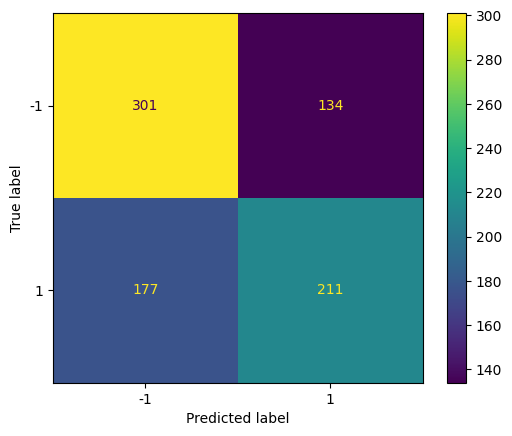

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

ConfusionMatrixDisplay.from_predictions(y_test, predicted)
plt.show()

สรุปผล Logistic Regression (Classification Report)

In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.63      0.69      0.66       435
           1       0.61      0.54      0.58       388

    accuracy                           0.62       823
   macro avg       0.62      0.62      0.62       823
weighted avg       0.62      0.62      0.62       823



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f"สรุปประสิทธิภาพของโมเดล Logistic Regression\n")
print(f"Accuracy  = {accuracy_score(y_test,predicted):.4f}  หรือ  {accuracy_score(y_test,predicted)*100:.2f} %")
print(f"Precision = {precision_score(y_test, predicted, average='weighted'):.4f}  หรือ  {precision_score(y_test, predicted, average='weighted')*100:.2f} %")
print(f"Recall    = {recall_score(y_test, predicted, average='weighted'):.4f}")
print(f"F1 Score  = {f1_score(y_test, predicted, average='macro'):.4f}")

สรุปประสิทธิภาพของโมเดล Logistic Regression

Accuracy  = 0.6221  หรือ  62.21 %
Precision = 0.6212  หรือ  62.12 %
Recall    = 0.6221
F1 Score  = 0.6175


In [ ]:
df_predict = pd.DataFrame()
df_predict['y_test'] = y_test
df_predict['y_predict'] = predicted.astype('int64')
print(f"\nตารางเปรียบเทียบระหว่าง ค่าจริง(y_test) กับ ค่าที่โมเดลทำนายได้(y_predict) \n")
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(df_predict)


ตารางเปรียบเทียบระหว่าง ค่าจริง(y_test) กับ ค่าที่โมเดลทำนายได้(y_predict) 



,y_test,y_predict
0,-1,-1
1,-1,-1
2,1,-1
3,1,1
4,-1,-1
...,...,...
818,-1,1
819,1,1
820,-1,-1
821,1,1


In [ ]:
df_predict2 = df_predict.replace([1, -1], ['up','down'])
display(df_predict2)

,y_test,y_predict
0,down,down
1,down,down
2,up,down
3,up,up
4,down,down
...,...,...
818,down,up
819,up,up
820,down,down
821,up,up


Create Trading Strategy Using The Model

In [897]:
Predicted_Signal = pd.DataFrame(model.predict(X))
BTC_Returns = np.log(df['Close']/df['Close'].shift(1))

#Create Dataframe
df_trade = pd.DataFrame()
df_trade['Datetime'] = df['Datetime']
df_trade['Predicted_Signal'] = Predicted_Signal
df_trade['BTC_Returns'] = BTC_Returns
Startegy_returns = df_trade['BTC_Returns']* df_trade['Predicted_Signal'].shift(1)
df_trade['Startegy_returns'] = Startegy_returns

Cumulative_BTC_returns = np.cumsum(df_trade[split:]['BTC_Returns'])
Cumulative_Strategy_returns = np.cumsum(df_trade[split:]['Startegy_returns'])

#Visualization
fig_cum = go.Figure()
fig_cum.add_trace(go.Scatter(x=df_trade[split:]["Datetime"],y=Cumulative_BTC_returns,name="BTC Returns",marker=dict(color="#636EFA"),showlegend=True))
fig_cum.add_trace(go.Scatter(x=df_trade[split:]["Datetime"],y=Cumulative_Strategy_returns,name="Strategy Returns", marker=dict(color="#EF553B"), showlegend=True))
fig_cum.update_layout(title=dict(text='BTC Returns vs. Strategy Returns', x=0.5,),xaxis_title="Datetime",yaxis_title='Cumulative Returns')

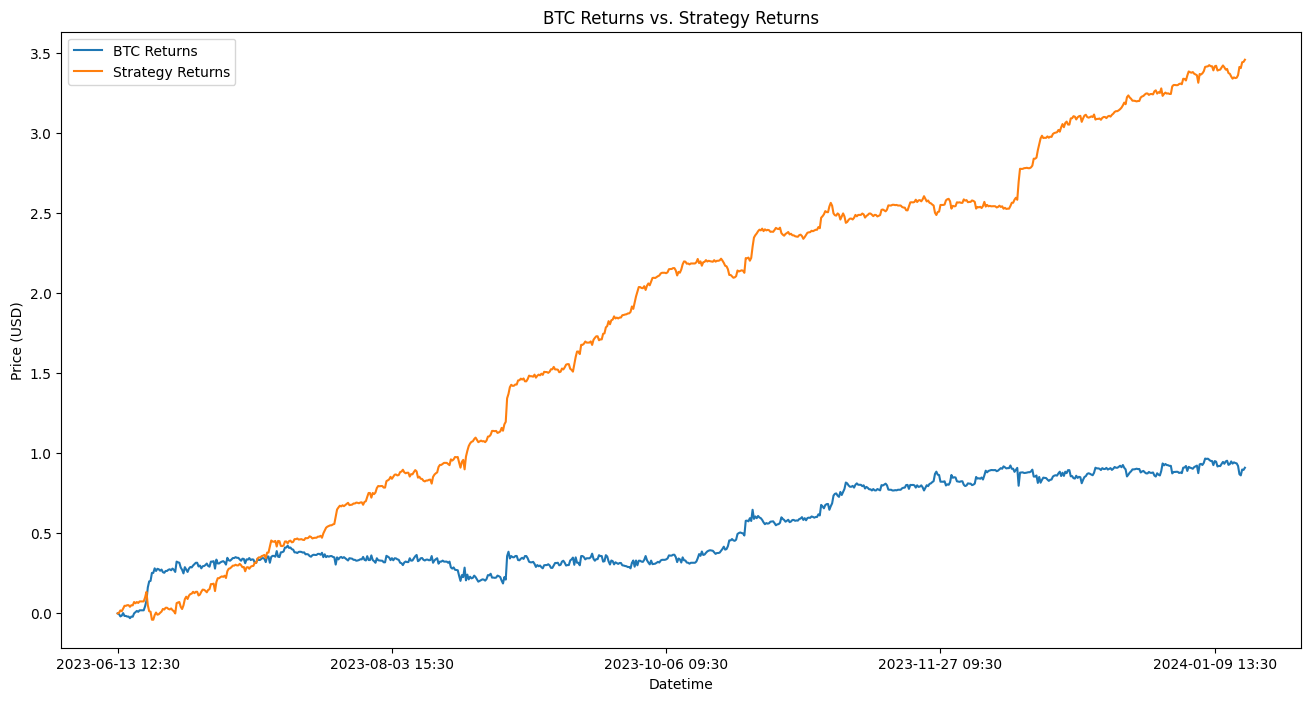

In [898]:
#Plot Trading Strategy โดยใช้ Matplotlib
df_trades = pd.DataFrame()
df_trades['Cum_BTC'] = Cumulative_BTC_returns
df_trades['Cum_Stg'] = Cumulative_Strategy_returns
df_trades['Datetime'] = df_trade['Datetime']
df_trades.set_index(['Datetime'],inplace=True)

plt.figure(figsize=(16, 8))
df_trades['Cum_BTC'].plot(label='BTC Returns')
df_trades['Cum_Stg'].plot(label='Strategy Returns')
plt.title('BTC Returns vs. Strategy Returns')
plt.xlabel('Datetime')
plt.ylabel('Price (USD)')
plt.legend()